In [1]:
from pathlib import Path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the DataManager class for data preprocessing
from tstoolkit.data_preprocess import DataManager

In [9]:
# Define the path to the time series data file
data_path = Path("../data/example_data.hd5")

# Create an instance of a data manager (DataManager) with the specified data file path
data_manager = DataManager(data_path)

# Load the time series data from the specified data file
data = data_manager.load_data()

data.head()

,PropertyID,DateTime,Value
0,300468,2020-01-01 00:00:00,65.992325
1,300468,2020-01-01 00:00:30,59.085239
2,300468,2020-01-01 00:01:00,63.399876
3,300468,2020-01-01 00:01:30,74.437500
4,300468,2020-01-01 00:02:00,60.391750


In [10]:

# Preprocess the time series data
data = data_manager.preprocess_data(data)

# Fill gaps or missing values in the time series data using linear interpolation
data = data_manager.interpolate_nulls(data, interpolation_method="linear")

data.set_index("DateTime",inplace=True)

# View top 5 rows of the processed data
data.head()

,300468,300498,305256,315036,340686,341124,341550
DateTime,,,,,,,
2020-01-01 00:00:00,65.992325,2036.845581,58.777546,114.388023,1.737929,5.342316,1.386370
2020-01-01 00:00:30,59.085239,2036.812866,67.127098,114.341003,1.691197,5.378604,1.403499
2020-01-01 00:01:00,63.399876,2036.780151,72.960365,114.293983,1.861186,5.308666,1.416289
2020-01-01 00:01:30,74.437500,2036.780334,71.723625,114.207180,1.830390,5.459568,1.512679
2020-01-01 00:02:00,60.391750,2036.780518,70.489014,114.120377,1.729635,5.588947,1.548172


In [11]:
# Calculate the total number of rows
total_rows = len(data)

# Divide the DataFrame into three equal parts
part_size = total_rows // 3

# Get the three equal parts
part1 = data.iloc[:part_size]
part2 = data.iloc[part_size:2 * part_size]
part3 = data.iloc[2 * part_size:]


In [12]:
# Print the minimum and maximum datetime index values for each part
print("Part 1 - Min Index:", part1.index.min())
print("Part 1 - Max Index:", part1.index.max())
print("\nPart 2 - Min Index:", part2.index.min())
print("Part 2 - Max Index:", part2.index.max())
print("\nPart 3 - Min Index:", part3.index.min())
print("Part 3 - Max Index:", part3.index.max())

Part 1 - Min Index: 2020-01-01 00:00:00
Part 1 - Max Index: 2020-01-01 08:00:30

Part 2 - Min Index: 2020-01-01 08:01:00
Part 2 - Max Index: 2020-01-01 16:00:30

Part 3 - Min Index: 2020-01-01 16:01:00
Part 3 - Max Index: 2020-01-01 23:59:30


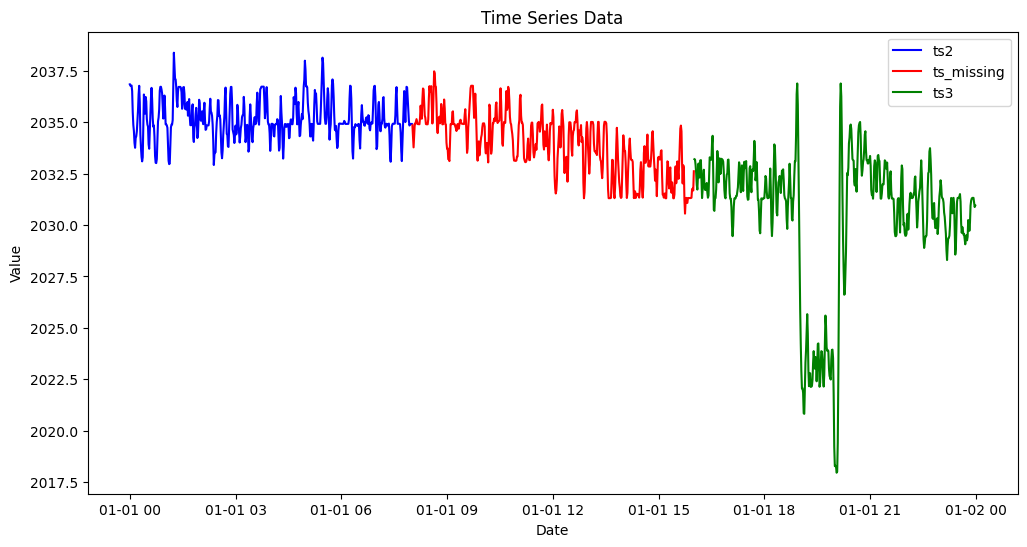

In [13]:
# Calculate the total number of rows
total_rows = len(data)

# Divide the DataFrame into three equal parts
part_size = total_rows // 3

# Get the three equal parts
part1 = data.iloc[:part_size]
part2 = data.iloc[part_size:2 * part_size]
part3 = data.iloc[2 * part_size:]


ts2 = part1['300498'].copy()
ts_missing = part2['300498'].copy()
ts3 = part3['300498'].copy()
# Define the resampling frequency (1 minute)
resampling_frequency = '1T'

# Resample each DataFrame
ts2 = ts2.resample(resampling_frequency).ffill()  # Forward fill to fill missing values
ts_missing = ts_missing.resample(resampling_frequency).ffill()
ts3 = ts3.resample(resampling_frequency).ffill()

# Plot the three time series with different colors
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot ts2 in blue
plt.plot(ts2.index, ts2.values, label='ts2', color='blue')

# Plot ts_missing in red
plt.plot(ts_missing.index, ts_missing.values, label='ts_missing', color='red')

# Plot ts3 in green
plt.plot(ts3.index, ts3.values, label='ts3', color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [14]:
# Define the resampling frequency (1 minute)
resampling_frequency = '1T'

# Resample each DataFrame
ts2 = ts2.resample(resampling_frequency).ffill()  # Forward fill to fill missing values
ts_missing = ts_missing.resample(resampling_frequency).ffill()
ts3 = ts3.resample(resampling_frequency).ffill()

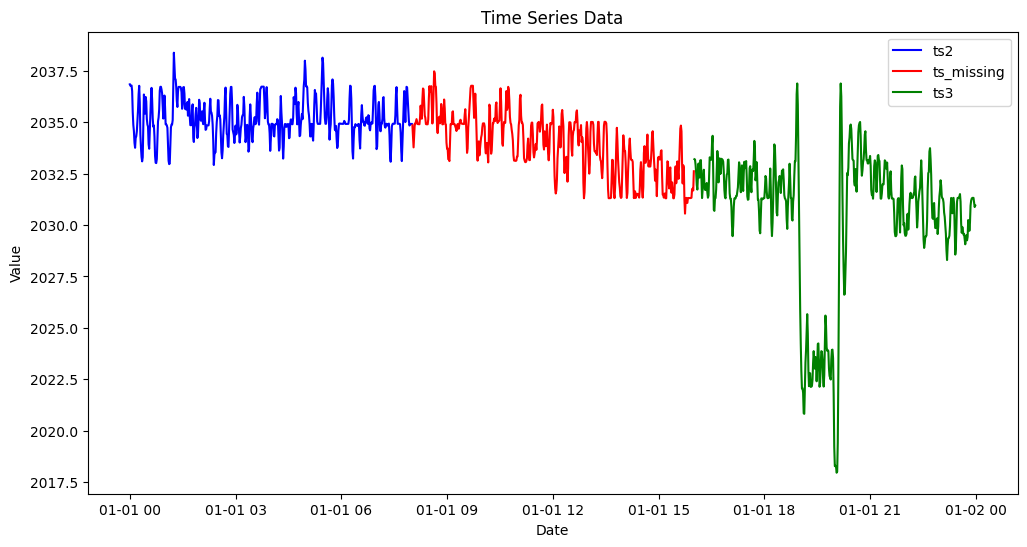

In [15]:
# Plot the three time series with different colors
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot ts2 in blue
plt.plot(ts2.index, ts2.values, label='ts2', color='blue')

# Plot ts_missing in red
plt.plot(ts_missing.index, ts_missing.values, label='ts_missing', color='red')

# Plot ts3 in green
plt.plot(ts3.index, ts3.values, label='ts3', color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [16]:
from datetime import timedelta
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from statsmodels.tsa.holtwinters import ExponentialSmoothing

seasonal_periods = 60

one = timedelta(minutes=1)

es_f = ExponentialSmoothing(ts2,  seasonal_periods=seasonal_periods,seasonal='add').fit()
pred23 = es_f.predict(start=ts2.index[-1]+one, end=ts3.index[0]-one)


In [17]:
ts3r = ts3[::-1]
ts2r = ts2[::-1]

indexr = pd.date_range(start=ts2.index[0], end=ts3.index[-1], freq='min')
ts2r.index = indexr[-len(ts2r):]
ts3r.index = indexr[:len(ts3r)]

In [18]:
es_b = ExponentialSmoothing(ts3r,  seasonal_periods=seasonal_periods,seasonal='add').fit()

In [19]:
pred32 = es_b.predict(start=ts3r.index[-1]+one, end=ts2r.index[0]-one)

In [20]:
pred32.index = pred23.index.copy()

In [21]:
l = len(pred23)
pred = pd.Series([(pred32[i] * i + pred23[i] * (l -i) )/ l for i in range(l)], index=pred23.index.copy())

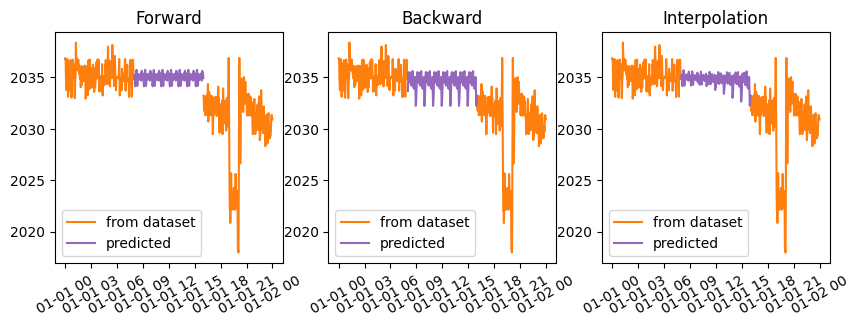

In [22]:
fig = plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
plt.plot(ts2, color='C1', label='from dataset')
plt.plot(ts3, color='C1')
plt.plot(pred23, color='C4', label='predicted')
plt.title('Forward')
plt.legend()
plt.xticks(rotation = 30) 

plt.subplot(1,3,2)
plt.plot(ts2,  color='C1', label='from dataset')
plt.plot(ts3, color='C1')
plt.plot(pred32, color='C4', label='predicted')
plt.title('Backward')
plt.legend()
plt.xticks(rotation = 30) 

plt.subplot(1,3,3)
plt.plot(ts2,  color='C1', label='from dataset')
plt.plot(ts3,  color='C1')
plt.plot(pred, color='C4', label='predicted')
plt.title('Interpolation')
plt.legend()
plt.xticks(rotation = 30) 


plt.show()

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def fillgap(firstTS, secondTS, seasonal_periods = 60):
    
    #PREPARATION
    one = timedelta(minutes=1)
    secondTSr = secondTS[::-1].copy()
    firstTSr = firstTS[::-1].copy()
    indexr = pd.date_range(start=firstTS.index[0], end=secondTS.index[-1], freq='min')
    firstTSr.index = indexr[-len(firstTSr):]
    secondTSr.index = indexr[:len(secondTSr)]
    
    #FORWARD    
    es = ExponentialSmoothing(firstTS,  seasonal_periods=seasonal_periods,seasonal='add').fit()
    forwardPrediction = es.predict(start=firstTS.index[-1]+one, end=secondTS.index[0]-one)
    
    #BACKWARD
    es = ExponentialSmoothing(secondTSr,  seasonal_periods=seasonal_periods,seasonal='add').fit()
    backwardPrediction = es.predict(start=secondTSr.index[-1]+one, end=firstTSr.index[0]-one)
    
    #WEIGHTED_AVERAGE
    l = len(forwardPrediction)
    filled_series = pd.Series([(backwardPrediction[i] * i + forwardPrediction[i] * (l -i) )/ l for i in range(l)], index=forwardPrediction.index.copy())
  
    return filled_series


In [26]:
gap = fillgap(ts2,ts3)

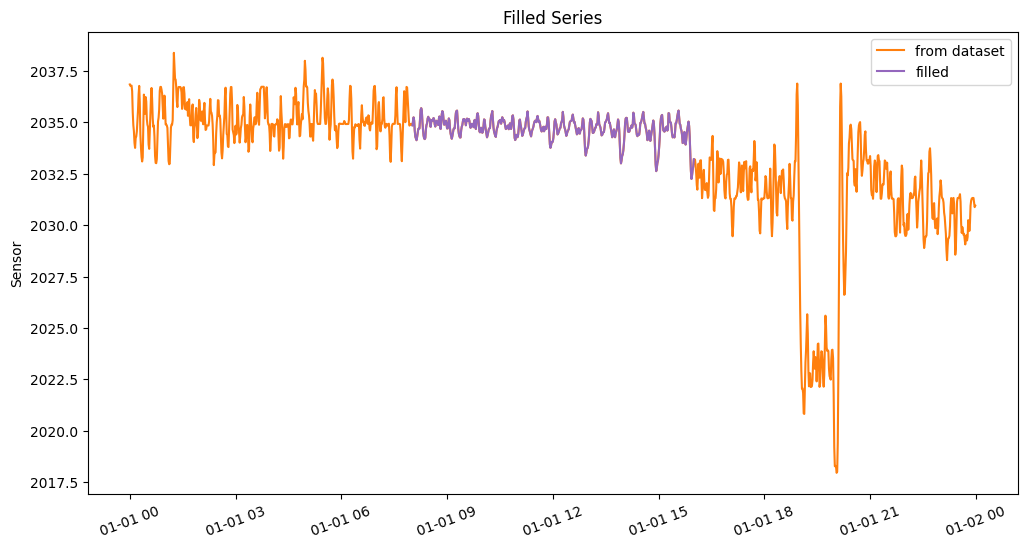

In [27]:
gap = fillgap(ts2,ts3)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

ts = pd.concat([ts2,gap,ts3])

plt.plot(ts, color='C1', label='from dataset')
plt.plot(gap, color='C4', label = 'filled')
plt.ylabel('Sensor')
plt.title('Filled Series')
plt.legend()
plt.xticks(rotation = 20)

plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing

class GapFiller:
    """Class for Filling Gaps in Time Series data.
    """
    def __init__(self, seasonal_periods: int =60) -> None:
        """Constructor Initialization.

        :param seasonal_periods: The number of periods in a 
        complete seasonal cycle, e.g., 4 for quarterly data or 7 
        for daily data with a weekly cycle., defaults to 60
        :type seasonal_periods: int, optional
        """
        self.seasonal_periods = seasonal_periods
        self.firstTS = None
        self.secondTS = None

    def fit(self, firstTS: pd.Series, secondTS: pd.Series) -> None:
        """Fitting Gap Filling Method

        :param firstTS: Part of Time series before the gap.
        :type firstTS: pd.Series
        :param secondTS: Part of time series after the gap.
        :type secondTS: pd.Series
        """

        self.firstTS = firstTS
        self.secondTS = secondTS

        # PREPARATION
        one = timedelta(minutes=1)
        secondTSr = secondTS[::-1].copy()
        firstTSr = firstTS[::-1].copy()
        indexr = pd.date_range(start=firstTS.index[0], end=secondTS.index[-1], freq='min')
        firstTSr.index = indexr[-len(firstTSr):]
        secondTSr.index = indexr[:len(secondTSr)]

        # FORWARD
        es1 = ExponentialSmoothing(firstTS, seasonal_periods=self.seasonal_periods, seasonal='add').fit()
        forwardPrediction = es1.predict(start=firstTS.index[-1] + one, end=secondTS.index[0] - one)

        # BACKWARD
        es2 = ExponentialSmoothing(secondTSr, seasonal_periods=self.seasonal_periods, seasonal='add').fit()
        backwardPrediction = es2.predict(start=secondTSr.index[-1] + one, end=firstTSr.index[0] - one)

        # WEIGHTED_AVERAGE
        l = len(forwardPrediction)
        filled_series = pd.Series([(backwardPrediction[i] * i + forwardPrediction[i] * (l - i)) / l for i in range(l)], index=forwardPrediction.index.copy())

        self.filled_series = filled_series

    def predict(self) -> pd.Series:
        """Getting the filled time series.

        :return: Filled Time Series
        :rtype: pd.Series
        """
        return self.filled_series

    def plot_ts(self) -> None:
        """Plot all three parts of time series combined.
        """
        plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

        plt.plot(self.firstTS, color='C1', label='First TS')
        plt.plot(self.filled_series, color='C4', label='Filled Gap')
        plt.plot(self.secondTS, color='C2', label='Second TS')

        plt.ylabel('Value')
        plt.title('Filled Series')
        plt.legend()
        plt.xticks(rotation=20)

        plt.show()

    def merge_ts(self) ->pd.Series:
        """Returning a merged time series of all three parts.

        :return: Merged Time series
        :rtype: pd.Series
        """
        return pd.concat([self.firstTS, self.filled_series, self.secondTS])


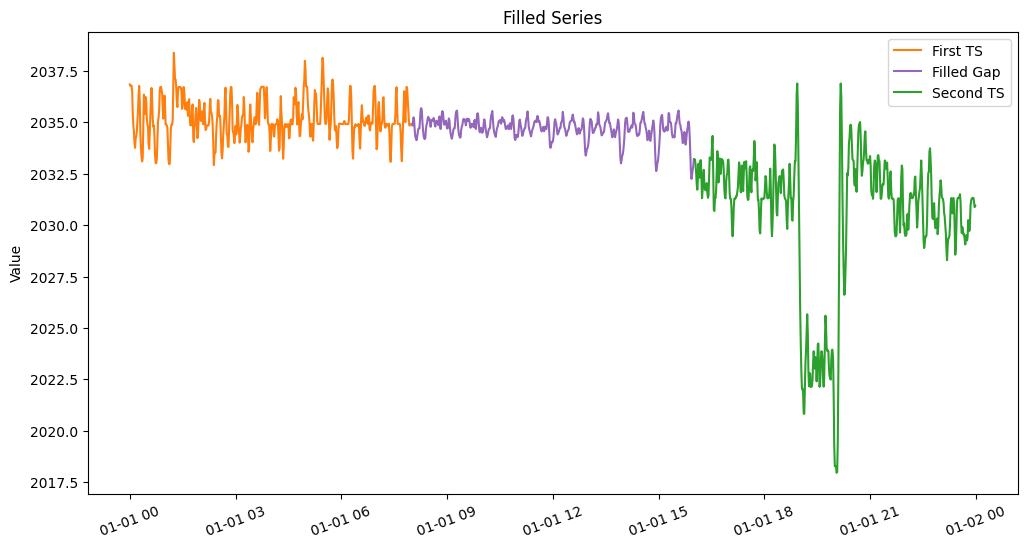

In [29]:

filler = GapFiller(seasonal_periods=60)
filler.fit(ts2, ts3)
filled_series = filler.predict()
merged_ts = filler.merge_ts()
filler.plot_ts()


# Sensor # 1

In [30]:
data.columns

Index(['300468', '300498', '305256', '315036', '340686', '341124', '341550'], dtype='object')

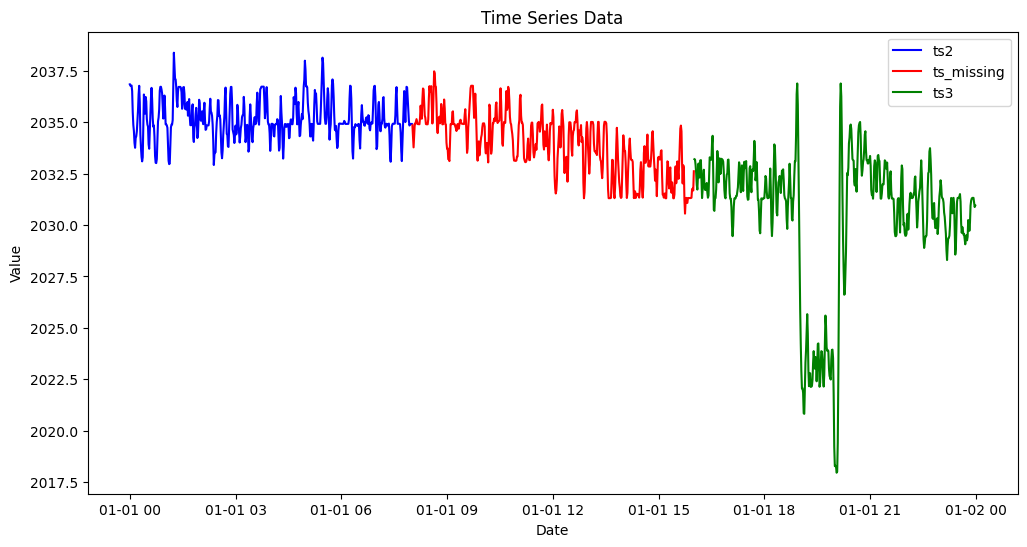

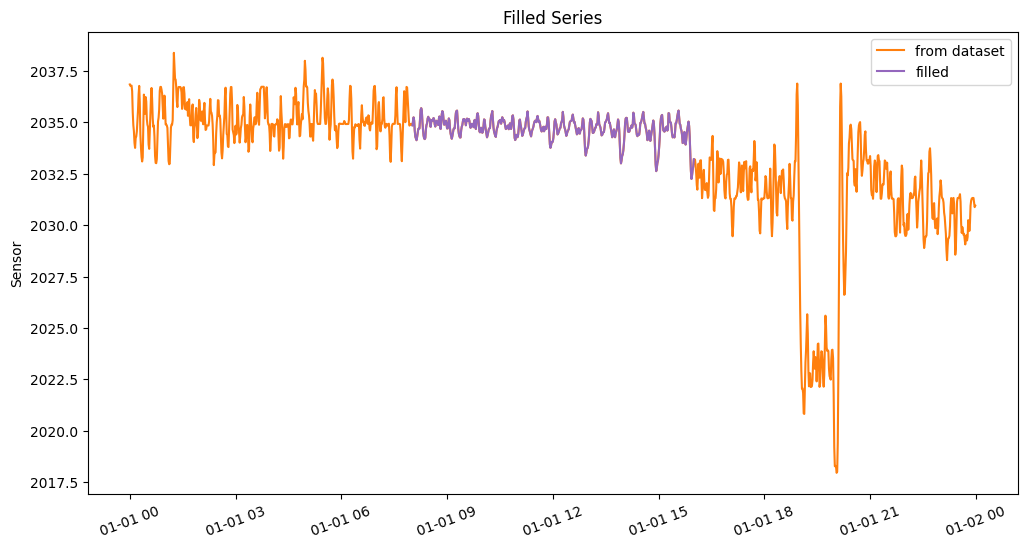

In [31]:
ts2 = part1['300498'].copy()
ts_missing = part2['300498'].copy()
ts3 = part3['300498'].copy()
# Define the resampling frequency (1 minute)
resampling_frequency = '1T'

# Resample each DataFrame
ts2 = ts2.resample(resampling_frequency).ffill()  # Forward fill to fill missing values
ts_missing = ts_missing.resample(resampling_frequency).ffill()
ts3 = ts3.resample(resampling_frequency).ffill()

# Plot the three time series with different colors
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot ts2 in blue
plt.plot(ts2.index, ts2.values, label='ts2', color='blue')

# Plot ts_missing in red
plt.plot(ts_missing.index, ts_missing.values, label='ts_missing', color='red')

# Plot ts3 in green
plt.plot(ts3.index, ts3.values, label='ts3', color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


gap = fillgap(ts2,ts3,seasonal_periods = 60)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

ts = pd.concat([ts2,gap,ts3])

plt.plot(ts, color='C1', label='from dataset')
plt.plot(gap, color='C4', label = 'filled')
plt.ylabel('Sensor')
plt.title('Filled Series')
plt.legend()
plt.xticks(rotation = 20)

plt.show()